# Titanic Project

# Problem Statement:
    
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Loading the Datasets

In [3]:
df=pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Checking to 5 rows

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking last 5 rows

In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Checking shape of the dataset-

In [7]:
df.shape

(891, 12)

we have 891 rows and 12 attribute including target attribute.

Survived is our target attribute.

Checking Columns

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking Data types

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In our dataset 5 attribute have object datatype.

we have 5 attribute of numeric datatype.

out of 2 numerical attributes we have Age and fare which have float datatype.

Checking Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values present in cabin,Embarked and Age columns.

In [13]:
#getting percentage of null values present in data
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Cabin consist 77% of Null Data.

<AxesSubplot:title={'center':'Null values '}>

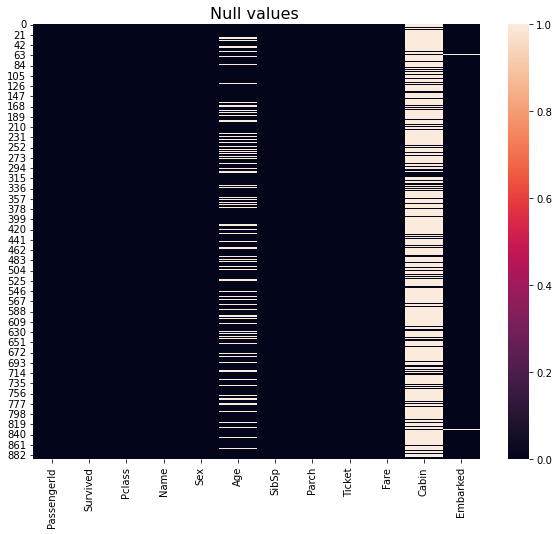

In [14]:
#ploting dataset for double check null values
plt.figure(figsize=(10,8))
plt.title('Null values ',fontsize=16)
sns.heatmap(df.isnull())

As We can see cabin ,age and embarked contains null values

Handling the missing values

In [15]:
df = df.drop(columns='Cabin', axis=1)

Dropping  the “Cabin” column from the data frame as it won’t be of much importance

In [16]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

Replacing the missing values in the “Age” column with the mean value

In [17]:
print(df['Embarked'].mode())

0    S
dtype: object


Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

In [18]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Replacing the missing values in the “Embarked” column with mode value

In [21]:
## we will drop non significant attributed for our Target Attribute such as passengerID, Name, Ticket.
df=df.drop(['PassengerId','Name','Ticket'],axis=1)

In [24]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Check Null Values

In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df.isnull().sum().sum()

0

Missing values sucessfully fill

Descriptive Analysis

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


Checking Description through heatmap.

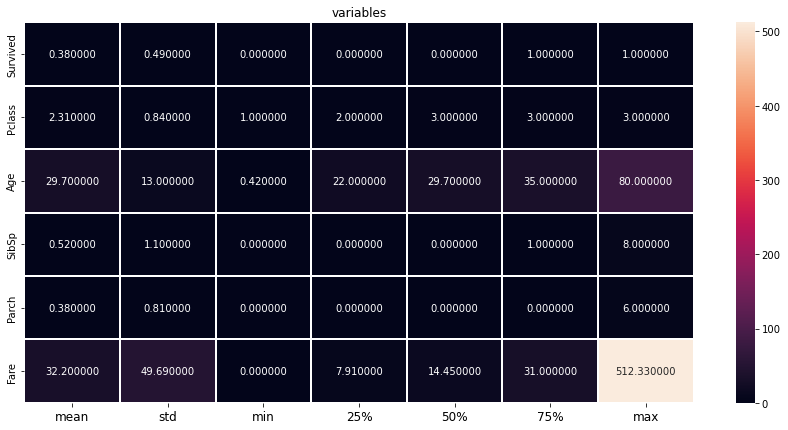

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

Data Visualization

<AxesSubplot:title={'center':'Distribution of Target column'}, xlabel='Survived', ylabel='count'>

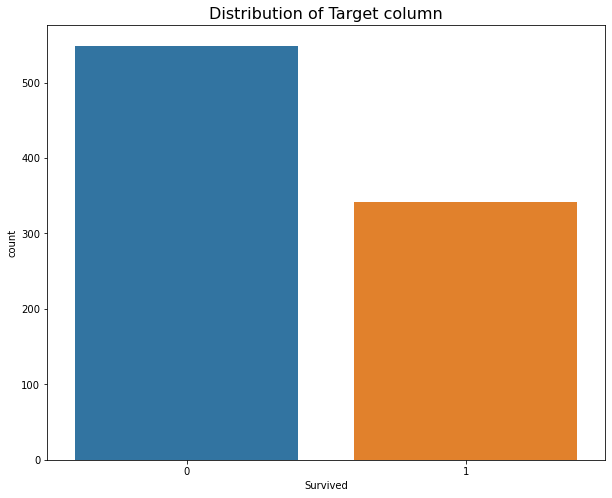

In [29]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Target column',fontsize=16)
sns.countplot(df['Survived'],data=df)

<AxesSubplot:title={'center':'sex value counts'}, xlabel='Sex', ylabel='count'>

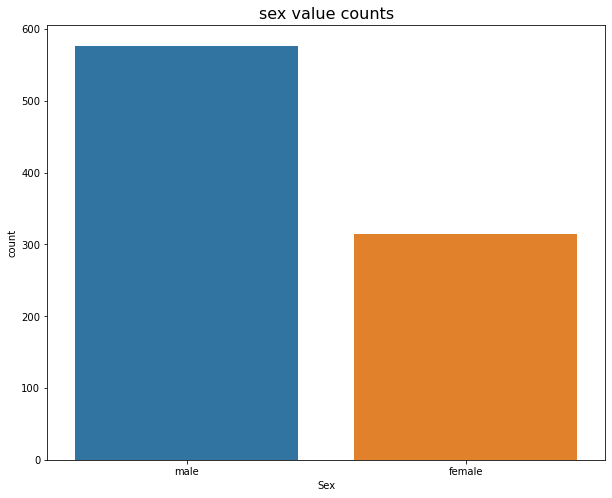

In [30]:
plt.figure(figsize=(10,8))
plt.title("sex value counts",fontsize=16)
sns.countplot(df['Sex'],data=df)

Number of male passengers are higher than the Female passenger.

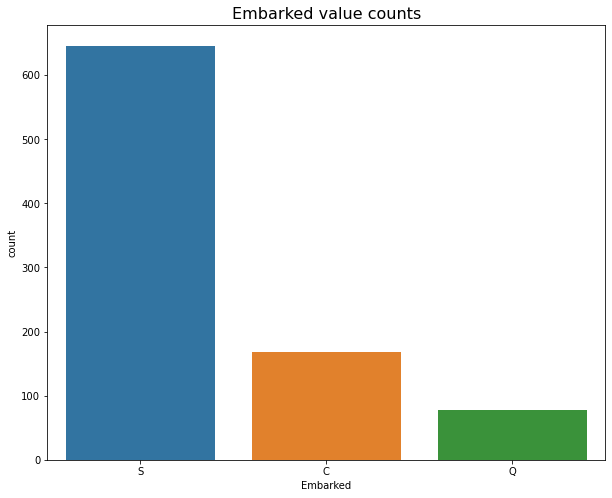

In [31]:
plt.figure(figsize=(10,8))
plt.title('Embarked value counts',fontsize=16)
sns.countplot(df['Embarked'],data=df);

Most of passengers were get on ship from S

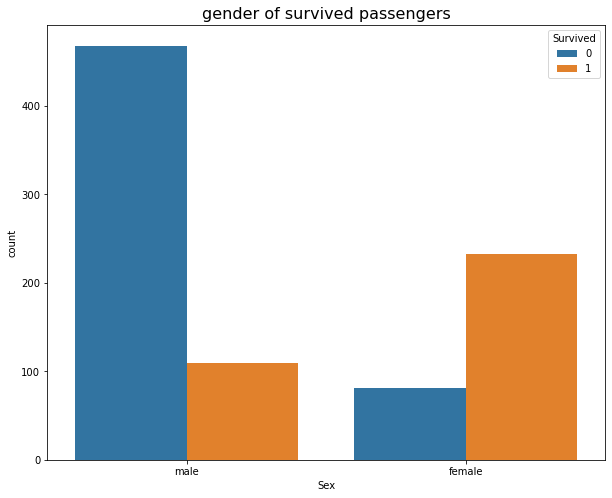

In [32]:
plt.figure(figsize=(10,8))
plt.title('gender of survived passengers',fontsize=16)
sns.countplot(df['Sex'],hue='Survived',data=df);

Mostly female were survived

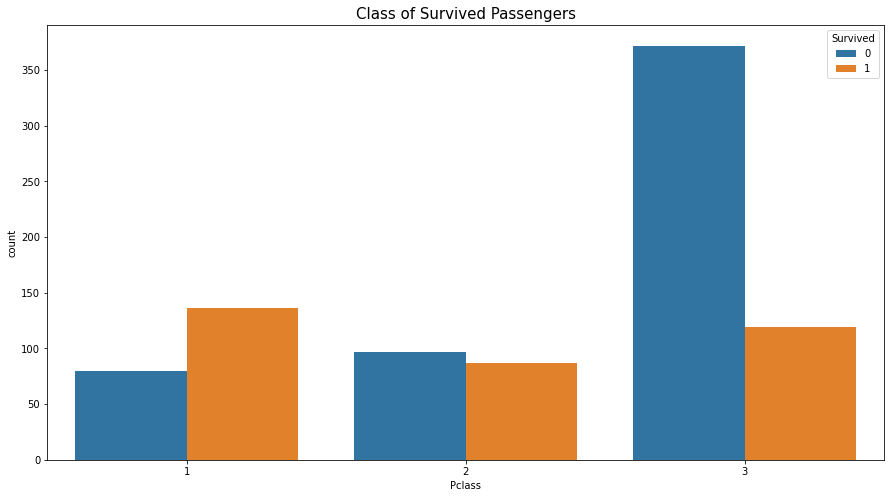

In [33]:
plt.figure(figsize=(15,8))
plt.title('Class of Survived Passengers',fontsize=15)
sns.countplot(df['Pclass'],hue='Survived',data=df);

We can see the wealthy peeps who belongs to class 1 survived mostly peeps who bought ticket of third class died mostly

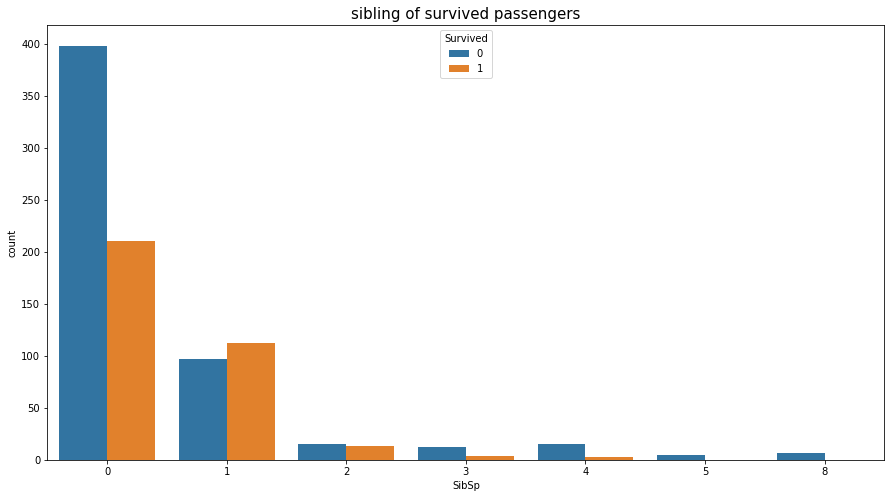

In [34]:
plt.figure(figsize=(15,8))
plt.title('sibling of survived passengers',fontsize=15)
sns.countplot(df['SibSp'],hue='Survived',data=df);

we can see that familes with 0 or one sibs are survived more

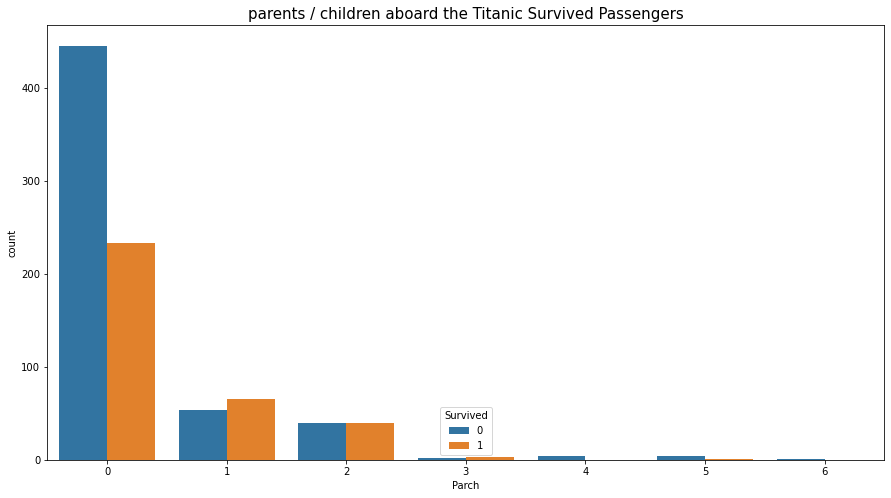

In [35]:
plt.figure(figsize=(15,8))
plt.title('parents / children aboard the Titanic Survived Passengers',fontsize=15)
sns.countplot(df['Parch'],hue='Survived',data=df);

People who travel alone have highest chance for survival.

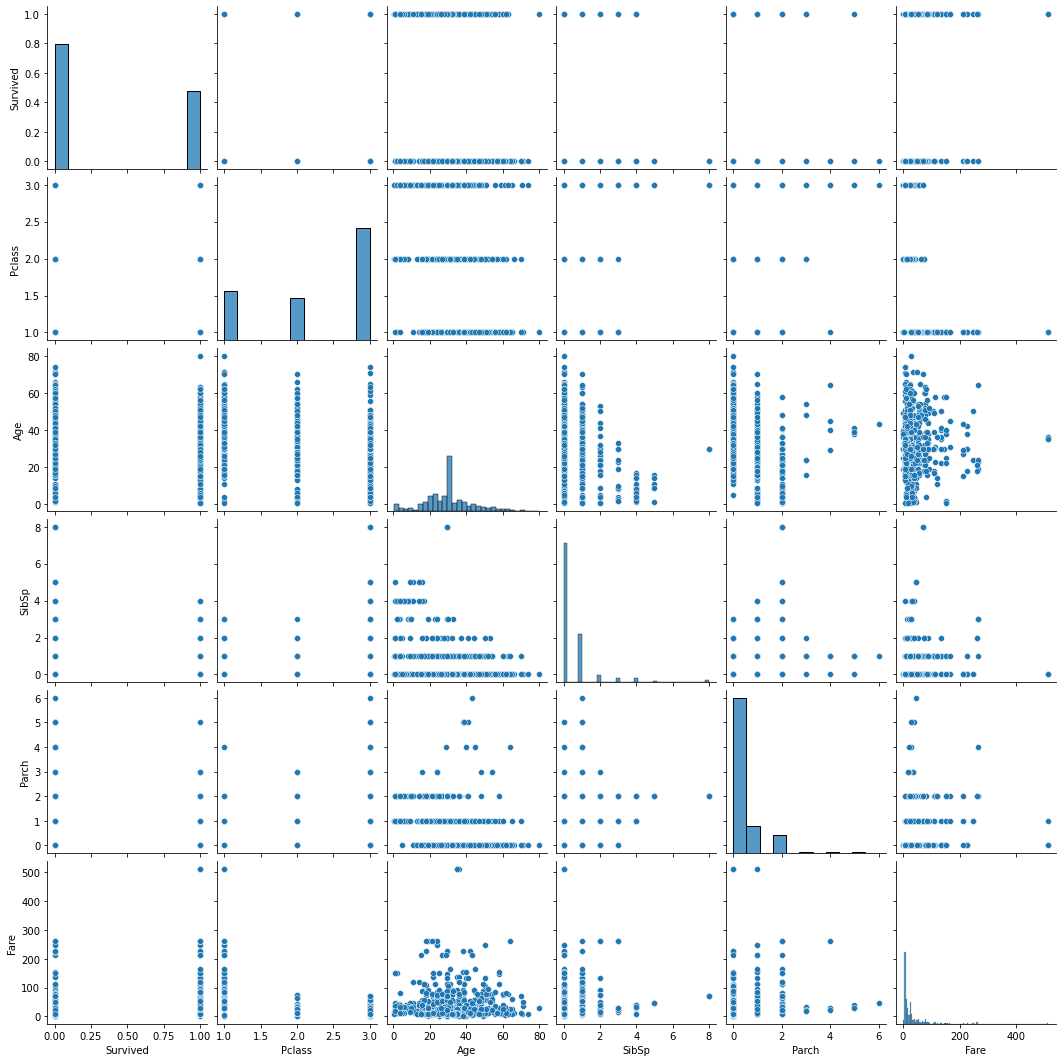

In [36]:
# ploting pairplot
sns.pairplot(df)

Checking Normal Data Distribution

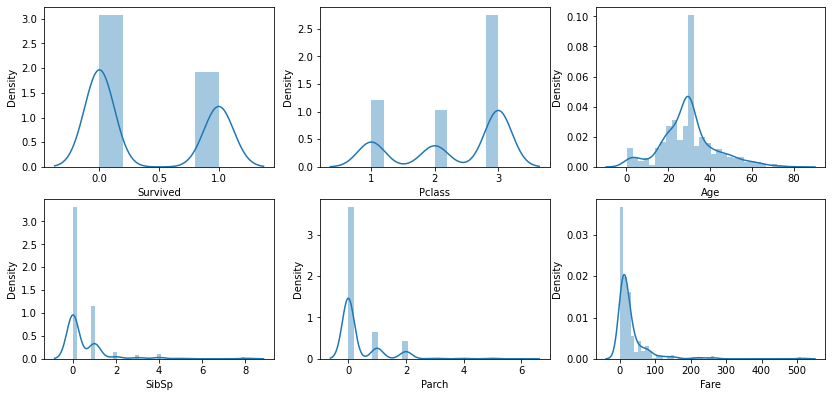

In [40]:
di=df.select_dtypes(exclude='object')
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.distplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()  

1-Here Survived, Pclass,Sibsp,Parch are encoded labels so we don't need to perform any operation here.

2-Age and fare only float datatype in which Age is normally distributed but Fare is Right skewed.

Checking Correlation

In [41]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [42]:
df.corr()["Survived"].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

Checking Correlation with heatmap

<AxesSubplot:>

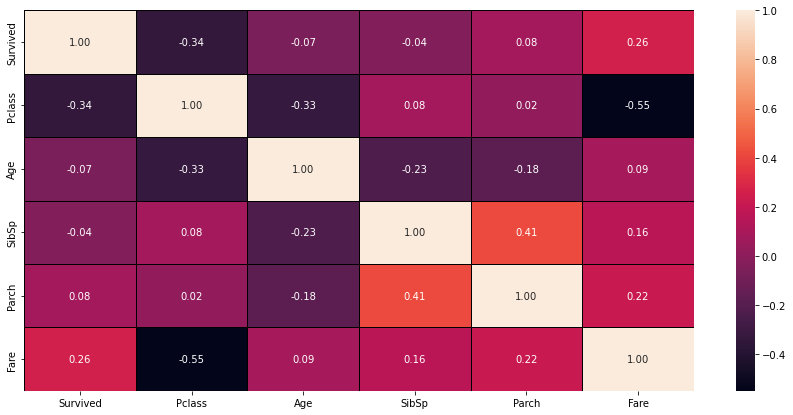

In [43]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

Checking Outliers

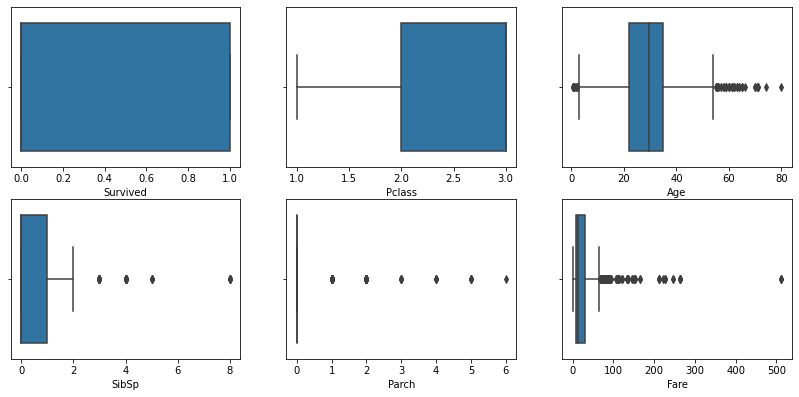

In [47]:
plt.figure(figsize=(14,10))
plot=1
for col in di:
    if plot<=13:
        plt.subplot(3,3,plot)
        sns.boxplot(di[col])
        plt.xlabel(col)
        plot=plot+1
plt.show()

1-Parch,sibSp are categorcial in nature which are encoded in our data so we won't perform any operation here.

2-If we see the outliers in Age and fare, We can see that Outliers in Age are very near to the uppper & Lower Whisker.

3-We can perform different operations here to handle these outliers.

Removing Outliers

Zscore method using Scipy

In [66]:
from scipy.stats import zscore

In [70]:
#  Outliers will be removed only from Continuous column variable i.e; Age and Fare. 
#We will not remove outliers from Categorical column i.e; SibSp, Parch
variables = df[['Age','Fare']]
z=np.abs(zscore(variables))
# Creating new dataframe
df_new = df[(z<3).all(axis=1)]
df_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Sex']=le.fit_transform(df_new['Sex'])
df_new['Embarked']=le.fit_transform(df_new['Embarked'])

In [72]:
z.head()

,Age,Fare
0,0.592481,0.502445
1,0.638789,0.786845
2,0.284663,0.488854
3,0.407926,0.420730
4,0.407926,0.486337


In [73]:
len(np.where(z>3)[0])

27

In [74]:
print("Old DataFrame data in Rows and Column:",df.shape)
print("New DataFrame data in Rows and Column:",df_new.shape)
print("Total Dropped rows:",df.shape[0]-df_new.shape[0])

Old DataFrame data in Rows and Column: (891, 8)
New DataFrame data in Rows and Column: (864, 8)
Total Dropped rows: 27


Percentage Data Loss using Zscore

In [75]:
loss_percent=(891-864)/891*100
print(loss_percent,"%")

3.0303030303030303 %


Checking for the skewness

In [76]:
df_new.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       3.751753
Parch       2.840412
Fare        2.257178
Embarked   -1.328443
dtype: float64

Data visualization of skewed continuous column using distplot

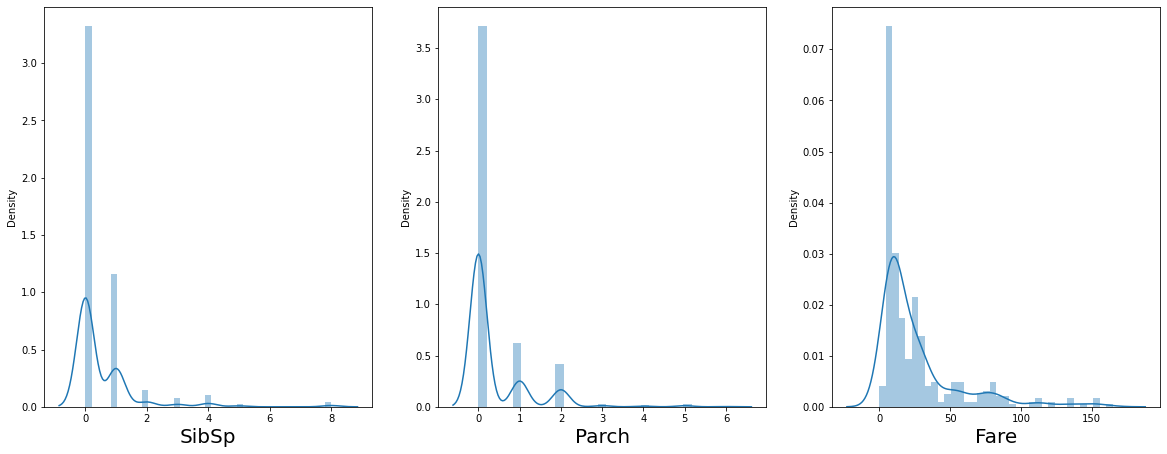

In [78]:
collist=["SibSp", "Parch", "Fare"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df[collist]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Removing skewness using yeo-johnson method

In [79]:
from sklearn.preprocessing  import power_transform

In [80]:
collist=["SibSp", "Parch", "Fare"]
df_new[collist]=power_transform(df_new[collist],method='yeo-johnson')
df_new[collist]

,SibSp,Parch,Fare
0,1.374574,-0.548637,-0.882769
1,1.374574,-0.548637,1.529038
2,-0.680931,-0.548637,-0.792444
3,1.374574,-0.548637,1.216581
4,-0.680931,-0.548637,-0.776493
...,...,...,...
886,-0.680931,-0.548637,-0.279691
887,-0.680931,-0.548637,0.607981
888,1.374574,1.879004,0.345275
889,-0.680931,-0.548637,0.607981


In [81]:
df_new.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       0.805038
Parch       1.277888
Fare       -0.009095
Embarked   -1.328443
dtype: float64

Data preprocessing

Spliting data into Target and Features:

In [89]:
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

In [90]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.374574,-0.548637,-0.882769,2
1,1,0,38.0,1.374574,-0.548637,1.529038,0
2,3,0,26.0,-0.680931,-0.548637,-0.792444,2
3,1,0,35.0,1.374574,-0.548637,1.216581,2
4,3,1,35.0,-0.680931,-0.548637,-0.776493,2


In [91]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 864, dtype: int64

In [93]:
x.shape

(864, 7)

In [94]:
y.shape

(864,)

In [95]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.801719,0.733053,-0.586622,1.374574,-0.548637,-0.882769,0.572159
1,-1.641615,-1.364158,0.695098,1.374574,-0.548637,1.529038,-2.002556
2,0.801719,-1.364158,-0.266192,-0.680931,-0.548637,-0.792444,0.572159
3,-1.641615,-1.364158,0.454776,1.374574,-0.548637,1.216581,0.572159
4,0.801719,0.733053,0.454776,-0.680931,-0.548637,-0.776493,0.572159
...,...,...,...,...,...,...,...
859,-0.419948,0.733053,-0.186085,-0.680931,-0.548637,-0.279691,0.572159
860,-1.641615,-1.364158,-0.826945,-0.680931,-0.548637,0.607981,0.572159
861,0.801719,-1.364158,0.030135,1.374574,1.879004,0.345275,0.572159
862,-1.641615,0.733053,-0.266192,-0.680931,-0.548637,0.607981,-2.002556


Creating Models

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [114]:
def max_accuracy_score(clf,x,y):
    max_accuracy=0
    for i in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i,stratify=y)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        accuracy_check=accuracy_score(y_test,pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('\n')
    print('cross validation score',cross_val_score(clf,x,y,scoring='accuracy').mean())
    print('\n')
    print('Standard Deviation',cross_val_score(clf,x,y,scoring='accuracy').std())
    print('\n')
    print('Training accuracy',clf.score(x_train,y_train))
    print('\n')
    print('Test Accuracy',clf.score(x_test,y_test))
    print('\n')
    print('Confusion Matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('\n')
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    return final_r

Logistic Regression

In [115]:
lg=LogisticRegression()
max_accuracy_score(lg,x,y)

max Accuracy score corresponding to 77 is 0.8439306358381503


cross validation score 0.7916789891114397


Standard Deviation 0.00785810989893803


Training accuracy 0.8017366136034733


Test Accuracy 0.7861271676300579


Confusion Matrix [[86 22]
 [15 50]]


Classification Report               precision    recall  f1-score   support

           0       0.85      0.80      0.82       108
           1       0.69      0.77      0.73        65

    accuracy                           0.79       173
   macro avg       0.77      0.78      0.78       173
weighted avg       0.79      0.79      0.79       173



Roc_auc Score 0.7827635327635327


77

DecisionTreeClassifier

In [116]:
dt=DecisionTreeClassifier()
max_accuracy_score(dt,x,y)

max Accuracy score corresponding to 69 is 0.8208092485549133


cross validation score 0.7743379486490121


Standard Deviation 0.02782869421317759


Training accuracy 0.9826338639652678


Test Accuracy 0.7398843930635838


Confusion Matrix [[79 29]
 [16 49]]


Classification Report               precision    recall  f1-score   support

           0       0.83      0.73      0.78       108
           1       0.63      0.75      0.69        65

    accuracy                           0.74       173
   macro avg       0.73      0.74      0.73       173
weighted avg       0.76      0.74      0.74       173



Roc_auc Score 0.7426638176638176


69

K-Nearest Neighbour

In [117]:
knn=KNeighborsClassifier()
max_accuracy_score(knn,x,y)

max Accuracy score corresponding to 83 is 0.8670520231213873


cross validation score 0.8159967737599139


Standard Deviation 0.03265604277186206


Training accuracy 0.8639652677279306


Test Accuracy 0.815028901734104


Confusion Matrix [[94 14]
 [18 47]]


Classification Report               precision    recall  f1-score   support

           0       0.84      0.87      0.85       108
           1       0.77      0.72      0.75        65

    accuracy                           0.82       173
   macro avg       0.80      0.80      0.80       173
weighted avg       0.81      0.82      0.81       173



Roc_auc Score 0.7967236467236468


83

Naive Bayes

In [119]:
gnb=GaussianNB()
max_accuracy_score(gnb,x,y)

max Accuracy score corresponding to 80 is 0.8554913294797688


cross validation score 0.7604382309450195


Standard Deviation 0.0488934470459976


Training accuracy 0.7800289435600579


Test Accuracy 0.7456647398843931


Confusion Matrix [[77 31]
 [13 52]]


Classification Report               precision    recall  f1-score   support

           0       0.86      0.71      0.78       108
           1       0.63      0.80      0.70        65

    accuracy                           0.75       173
   macro avg       0.74      0.76      0.74       173
weighted avg       0.77      0.75      0.75       173



Roc_auc Score 0.7564814814814815


80

Support Vector Classifier

In [120]:
svc=SVC()
max_accuracy_score(svc,x,y)

max Accuracy score corresponding to 73 is 0.8728323699421965


cross validation score 0.8136913563651029


Standard Deviation 0.01533419469488617


Training accuracy 0.8379160636758322


Test Accuracy 0.791907514450867


Confusion Matrix [[92 16]
 [20 45]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.85      0.84       108
           1       0.74      0.69      0.71        65

    accuracy                           0.79       173
   macro avg       0.78      0.77      0.78       173
weighted avg       0.79      0.79      0.79       173



Roc_auc Score 0.7720797720797721


73

Random Forest Classifier

In [121]:
rf=RandomForestClassifier()
max_accuracy_score(rf,x,y)

max Accuracy score corresponding to 77 is 0.8554913294797688


cross validation score 0.806734776179594


Standard Deviation 0.024956661606584576


Training accuracy 0.9826338639652678


Test Accuracy 0.7745664739884393


Confusion Matrix [[87 21]
 [18 47]]


Classification Report               precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.69      0.72      0.71        65

    accuracy                           0.77       173
   macro avg       0.76      0.76      0.76       173
weighted avg       0.78      0.77      0.78       173



Roc_auc Score 0.7643162393162394


77

Gradient Boost Classifier

In [122]:
gbc=GradientBoostingClassifier()
max_accuracy_score(gbc,x,y)

max Accuracy score corresponding to 80 is 0.8728323699421965


cross validation score 0.8125151230004033


Standard Deviation 0.018349688572742877


Training accuracy 0.9088277858176556


Test Accuracy 0.815028901734104


Confusion Matrix [[95 13]
 [19 46]]


Classification Report               precision    recall  f1-score   support

           0       0.83      0.88      0.86       108
           1       0.78      0.71      0.74        65

    accuracy                           0.82       173
   macro avg       0.81      0.79      0.80       173
weighted avg       0.81      0.82      0.81       173



Roc_auc Score 0.7936609686609688


80

It is clear that Gradient Boosting Classifier if our best model because the difference between accuracy score and Cross validation score is minimum which shows that our Model is not overfit and best among all.

Hyperparameter Tuning of Gradient Boosting Classifier

In [127]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [128]:
gb=GradientBoostingClassifier(random_state=42)

In [129]:
# Creating Parameter List to pass in Grid SearchCV

parameters = {'max_features': ['auto','sqrt','log2'],
              'max_depth' : [4,5,6,7,8],
              'criterion' :['gini','entropy']}

In [130]:
gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2'}

In [132]:
gradient=GradientBoostingClassifier(learning_rate=.01,loss='deviance',max_depth=10,max_features=4,n_estimators=50)
gradient.fit(x_train,y_train)
pred=gradient.predict(x_test)
print('\n')
print('Accuracy Score',accuracy_score(y_test,pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,pred))
print('\n')
print('Roc_auc Score',roc_auc_score(y_test,pred))



Accuracy Score 0.861271676300578


Confusion Matrix
[[110   8]
 [ 16  39]]


Classification Report
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       118
           1       0.83      0.71      0.76        55

    accuracy                           0.86       173
   macro avg       0.85      0.82      0.83       173
weighted avg       0.86      0.86      0.86       173



Roc_auc Score 0.8206471494607086


We have improved our accuracy score so we will save this as our best model.

Saving Model

In [133]:
import joblib
joblib.dump(gradient,'titanic_grad.pkl')

['titanic_grad.pkl']

Loading Model

In [134]:
loaded_model=joblib.load('titanic_grad.pkl')
prediction=loaded_model.predict(x_test)

In [135]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1],
      dtype=int64)